In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('driver_profiles.csv')

In [3]:
df.head()

,driver_id,date,delays_minutes,behavioral_problems,violations_count,accidents_count,rating
0,1,2025-01-01,17,0,0,0,4.02
1,1,2025-01-02,5,0,0,0,4.02
2,1,2025-01-03,28,0,0,0,4.02
3,1,2025-01-04,12,0,0,0,4.02
4,1,2025-01-05,1,0,0,0,4.02


In [4]:
df.isna().sum()

driver_id              0
date                   0
delays_minutes         0
behavioral_problems    0
violations_count       0
accidents_count        0
rating                 0
dtype: int64

In [5]:
df.describe()

,driver_id,delays_minutes,behavioral_problems,violations_count,accidents_count,rating
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,25.500000,15.304667,0.050667,0.092222,0.012444,3.906511
std,14.432473,10.991351,0.219340,0.312277,0.110871,0.559803
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,6.000000,0.000000,0.000000,0.000000,3.520000
50%,25.500000,15.000000,0.000000,0.000000,0.000000,3.980000
75%,38.000000,23.000000,0.000000,0.000000,0.000000,4.320000
max,50.000000,54.000000,1.000000,3.000000,1.000000,4.800000


In [6]:
df.dtypes

driver_id                int64
date                    object
delays_minutes           int64
behavioral_problems      int64
violations_count         int64
accidents_count          int64
rating                 float64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df

,driver_id,date,delays_minutes,behavioral_problems,violations_count,accidents_count,rating
0,1,2025-01-01,17,0,0,0,4.02
1,1,2025-01-02,5,0,0,0,4.02
2,1,2025-01-03,28,0,0,0,4.02
3,1,2025-01-04,12,0,0,0,4.02
4,1,2025-01-05,1,0,0,0,4.02
...,...,...,...,...,...,...,...
4495,50,2025-03-27,24,0,0,0,3.73
4496,50,2025-03-28,31,0,0,0,3.68
4497,50,2025-03-29,23,0,1,0,3.73
4498,50,2025-03-30,16,0,0,0,3.73


In [9]:
df.tail(10)

,driver_id,date,delays_minutes,behavioral_problems,violations_count,accidents_count,rating
4490,50,2025-03-22,44,0,0,0,3.03
4491,50,2025-03-23,21,0,1,0,3.73
4492,50,2025-03-24,7,0,0,0,3.73
4493,50,2025-03-25,7,1,0,0,3.73
4494,50,2025-03-26,35,0,0,0,3.48
4495,50,2025-03-27,24,0,0,0,3.73
4496,50,2025-03-28,31,0,0,0,3.68
4497,50,2025-03-29,23,0,1,0,3.73
4498,50,2025-03-30,16,0,0,0,3.73
4499,50,2025-03-31,20,0,0,0,3.73


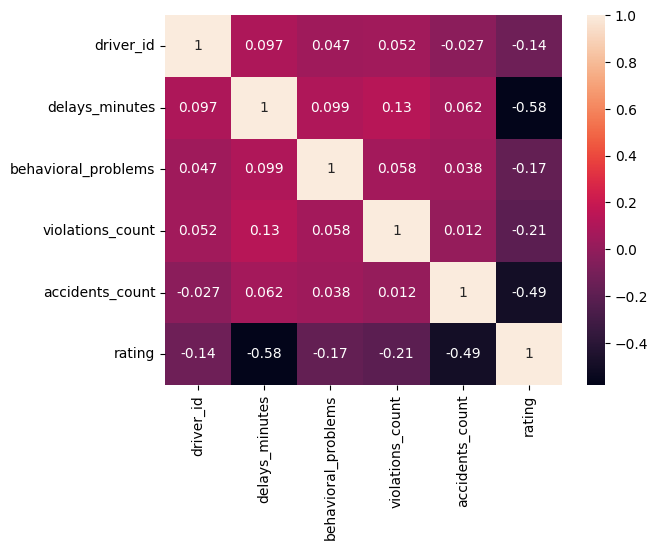

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Day 1: Exploratory Data Analysis Report

### 1. Overview
I generated a synthetic dataset of **50 drivers** over **90 days** to analyze performance metrics. The goal was to identify which factors most heavily impact a driver's rating.

### 2. Data Quality Check

* **Complteness:** No missing/NaN values were found in the dataset.
* **Consistency:** The data ranges (0-5 for ratings, 0-100+ for delays) are within expected logical bounds.

#### 3. Key Insights (from Heatmap)

I analyzed the correlation matrix to find relationships between bad behaviors and the final driver rating:

* **Delays are the biggest penalty:** The strongest negative correlation is between 'delays_minutes' and 'rating' (**r = 0.58**). This indicates that punctuality is the most heavily weighted factor in our scoring system.
*  **Accidents are severe:** There is a strong negative correlation between 'accidents_count' and 'rating' (**r = 0.49**).
*  **Violations have lower impact:** 'violations_count' affects the rating (**r = 0.21**) but less severly than delays or accidents.
*  **Independence of variable:** Interstingly, 'accidents' and 'delays' are not correlated (**r = 0.06**). This suggests that late drivers are not necessarily dangerous drivers. They are distinct behavioral problems.

### 4. Conclusion
The scoring logic is consistent. I can proceed to Day 2 (Database Setup) knowing that our data truthfully represents driver performance.